## **Bellabeat Smart Device Analysis and Machine Learning**

##### **Project Type**    - *EDA + Clustering/Regression/Classification*
##### **Contribution**    - *Individual*

## **Project Summary**

***Bellabeat Smart Device Analysis and Machine Learning***  

This project explores how Bellabeat, a wellness-focused smart device company, can leverage user fitness data to enhance engagement, personalize experiences, and drive strategic marketing.

Using real-world data from smart fitness trackers (like Fitbit), the analysis covers 18 datasets that include daily and minute-level logs of steps, calories, sleep, heart rate, and weight. The data was cleaned, aggregated, and merged to a daily level for consistency.

The project is divided into three main parts:

**1. Exploratory Data Analysis (EDA)**
Visual insights were drawn to understand user behavior across steps, sleep, BMI, calories, and activity levels. Key trends were identified linking physical activity with sleep efficiency and calorie burn.

**2. Feature Engineering & Modeling**
Features such as sleep efficiency, active minutes, and BMI were created.
  - **Clustering (K-Means)** segmented users into fitness personas.
  - **Regression (Random Forest)** predicted daily calorie burn.
  - **Classification (Random Forest)** accurately labeled users as "active" or "inactive" with 100% accuracy on the test set.

**3. Strategic Recommendations**
Based on insights, the project offers business-ready suggestions such as personalized fitness plans, smart notifications, and user engagement boosters.

## **GitHub Link**

[Github Repo](https://github.com/dipankarmajumdar/Bellabeat_Smart_Device_Data_Analysis_and_Machine_Learning.git)

## **1. Business Problem Statement**

Bellabeat is a wellness technology company that produces smart fitness devices designed to help women monitor and improve their physical health. As the health tech market becomes more competitive, Bellabeat wants to use data-driven insights to better understand how users interact with their smart devices.

The key question is:
**"How can Bellabeat use fitness and lifestyle data to increase user engagement, improve personalized features, and guide effective marketing strategies?"**

To answer this, Bellabeat’s analytics team will analyze user data collected from smart devices - covering daily steps, activity intensity, heart rate, calories burned, sleep duration, and more. By identifying patterns in user behavior and building predictive models, Bellabeat can:

- Offer targeted fitness recommendations
- Predict user performance (e.g., calorie burn, activity level)
- Segment users based on lifestyle and habits
- Send smart alerts and nudges to increase user motivation

The ultimate goal is to **turn raw fitness data into meaningful actions** that improve user satisfaction and support Bellabeat’s growth in the health and wellness space.

## **2. Data Sources & Description**

This project utilizes a comprehensive collection of **18 publicly available datasets** that represent user activity tracked by **Fitbit devices**. The datasets capture various aspects of **daily health and wellness behavior**, such as physical activity, heart rate, sleep patterns, and body metrics. These data points simulate the type of information Bellabeat’s smart devices would record.

The source of these datasets is a sample provided as part of a case study designed to analyze **fitness behavior and health monitoring**, closely aligned with the data generated by apps like Strava or Bellabeat’s ecosystem.

| Dataset Name                         | Description                                                                                                      |
| ------------------------------------ | ---------------------------------------------------------------------------------------------------------------- |
| `dailyActivity_merged.csv`           | Summary of users’ daily activity, including total steps, distance walked, calories burned, and intensity levels. |
| `dailyCalories_merged.csv`           | Records of total calories burned each day per user.                                                              |
| `dailyIntensities_merged.csv`        | Daily duration of physical activity categorized by intensity (light, moderate, vigorous).                        |
| `dailySteps_merged.csv`              | Total number of steps taken by each user per day.                                                                |
| `heartrate_seconds_merged.csv`       | Heart rate readings at 5-second intervals.                                                                       |
| `hourlyCalories_merged.csv`          | Calories burned per hour per user.                                                                               |
| `hourlyIntensities_merged.csv`       | Hourly physical activity intensity data.                                                                         |
| `hourlySteps_merged.csv`             | Steps recorded at hourly intervals.                                                                              |
| `minuteCaloriesNarrow_merged.csv`    | Calories burned every minute (compact format).                                                                   |
| `minuteCaloriesWide_merged.csv`      | Calories burned every minute (spread across multiple columns for each minute).                                   |
| `minuteIntensitiesNarrow_merged.csv` | Minute-by-minute activity intensity (narrow format).                                                             |
| `minuteIntensitiesWide_merged.csv`   | Minute-by-minute activity intensity (wide format).                                                               |
| `minuteMETsNarrow_merged.csv`        | Metabolic Equivalent (MET) values per minute, indicating energy expenditure.                                     |
| `minuteSleep_merged.csv`             | Sleep tracking at minute resolution.                                                                             |
| `minuteStepsNarrow_merged.csv`       | Step count per minute in narrow format.                                                                          |
| `minuteStepsWide_merged.csv`         | Step count per minute in wide format.                                                                            |
| `sleepDay_merged.csv`                | Daily sleep summary: total time in bed and actual minutes asleep.                                                |
| `weightLogInfo_merged.csv`           | Weight, BMI, and body fat percentage logged by users.                           |

## **3. Import Libraries**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
from functools import reduce

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# warnings
import warnings
warnings.filterwarnings('ignore')

# Plot Settings
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

## **4. Load and Merge Datasets**

In [2]:
# Load Datasets
folder = 'data/'
files = {name.replace('.csv', ''): pd.read_csv(folder + name) for name in [
    'dailyActivity_merged.csv','dailyCalories_merged.csv', 'dailyIntensities_merged.csv', 'dailySteps_merged.csv',
    'heartrate_seconds_merged.csv', 'hourlyCalories_merged.csv', 'hourlyIntensities_merged.csv', 'hourlySteps_merged.csv',
    'minuteCaloriesNarrow_merged.csv', 'minuteCaloriesWide_merged.csv', 'minuteIntensitiesNarrow_merged.csv',
    'minuteIntensitiesWide_merged.csv', 'minuteMETsNarrow_merged.csv', 'minuteSleep_merged.csv',
    'minuteStepsNarrow_merged.csv', 'minuteStepsWide_merged.csv', 'sleepDay_merged.csv', 'weightLogInfo_merged.csv'
]}

# Time column processing helpers
def extract_day(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['ActivityDate'] = pd.to_datetime(df[time_col].dt.date)
    return df

# Aggregation helper
def daily_aggregate(df, time_col):
    df = extract_day(df.copy(), time_col)
    df = df.drop(columns=[time_col])
    numeric_cols = df.select_dtypes(include='number').columns
    return df.groupby(['Id', 'ActivityDate'], as_index=False)[numeric_cols].sum()

# Preprocessing time-based datasets
files['sleepDay_merged']['SleepDay'] = pd.to_datetime(files['sleepDay_merged']['SleepDay'])
files['weightLogInfo_merged']['Date'] = pd.to_datetime(files['weightLogInfo_merged']['Date'])

# Rename conflicting columns to avoid MergeError
files['dailyCalories_merged'].rename(columns={'Calories': 'DailyCalories'}, inplace=True)
files['hourlyCalories_merged'].rename(columns={'Calories': 'HourlyCalories'}, inplace=True)
files['minuteCaloriesNarrow_merged'].rename(columns={'Calories': 'MinuteCalories'}, inplace=True)

# Heart rate daily stats
hr_daily = extract_day(files['heartrate_seconds_merged'], 'Time')
hr_daily = hr_daily.groupby(['Id', 'ActivityDate'])['Value'].agg(['mean', 'max']).reset_index()
hr_daily.columns = ['Id', 'ActivityDate', 'HR_mean', 'HR_max']

# Aggregate hourly and minute data
hourly_keys = ['hourlyCalories_merged', 'hourlyIntensities_merged', 'hourlySteps_merged']
minute_keys = ['minuteCaloriesNarrow_merged', 'minuteIntensitiesNarrow_merged', 'minuteMETsNarrow_merged', 'minuteStepsNarrow_merged']

for key in hourly_keys:
    files[key] = daily_aggregate(files[key], 'ActivityHour')

for key in minute_keys:
    files[key] = daily_aggregate(files[key], 'ActivityMinute')

# Rename date columns in daily datasets
files['dailyCalories_merged'].rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)
files['dailyIntensities_merged'].rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)
files['dailySteps_merged'].rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)

# Datasets to merge
datasets_to_merge = [
    extract_day(files['dailyActivity_merged'], 'ActivityDate'),
    extract_day(files['dailyCalories_merged'], 'ActivityDate'),
    extract_day(files['dailyIntensities_merged'], 'ActivityDate'),
    extract_day(files['dailySteps_merged'], 'ActivityDate'),
    files['sleepDay_merged'].rename(columns={"SleepDay": "ActivityDate"}),
    files['weightLogInfo_merged'].rename(columns={"Date": "ActivityDate"}),
    *[files[k] for k in hourly_keys],
    *[files[k] for k in minute_keys],
    hr_daily
]

# Normalize ActivityDate types
for i in range(len(datasets_to_merge)):
    datasets_to_merge[i]['ActivityDate'] = pd.to_datetime(datasets_to_merge[i]['ActivityDate'])

# Merge all datasets
merge_keys = ['Id', 'ActivityDate']
master_df = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how='outer'), datasets_to_merge)

# Final cleaning
master_df = master_df.sort_values(by=['Id', 'ActivityDate']).reset_index(drop=True)

# Output
print(f"Final merged dataset shape: {master_df.shape}")
master_df.head()

Final merged dataset shape: (2877, 44)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,FairlyActiveMinutes_x,LightlyActiveMinutes_x,SedentaryMinutes_x,Calories,DailyCalories,SedentaryMinutes_y,LightlyActiveMinutes_y,FairlyActiveMinutes_y,VeryActiveMinutes_y,SedentaryActiveDistance_y,LightActiveDistance_y,ModeratelyActiveDistance_y,VeryActiveDistance_y,StepTotal_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,HourlyCalories,TotalIntensity,AverageIntensity,StepTotal_y,MinuteCalories,Intensity,METs,Steps,HR_mean,HR_max
0,1503960366,2016-04-12,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,1985.0,728.0,328.0,13.0,25.0,0.0,6.06,0.55,1.88,13162.0,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,1797.0,776.0,217.0,19.0,21.0,0.0,4.71,0.69,1.57,10735.0,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0,1776.0,1218.0,181.0,11.0,30.0,0.0,3.91,0.40,2.44,10460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,1745.0,726.0,209.0,34.0,29.0,0.0,2.83,1.26,2.14,9762.0,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,1863.0,773.0,221.0,10.0,36.0,0.0,5.04,0.41,2.71,12669.0,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **5. Data Cleaning**

### **5.1 Check for missing values**

- **Count missing values by each column**

In [3]:
# Missing values by each column
master_df.isnull().sum()

Id                               0
ActivityDate                     0
TotalSteps                    1934
TotalDistance                 1934
TrackerDistance               1934
LoggedActivitiesDistance      1934
VeryActiveDistance_x          1934
ModeratelyActiveDistance_x    1934
LightActiveDistance_x         1934
SedentaryActiveDistance_x     1934
VeryActiveMinutes_x           1934
FairlyActiveMinutes_x         1934
LightlyActiveMinutes_x        1934
SedentaryMinutes_x            1934
Calories                      1934
DailyCalories                 1934
SedentaryMinutes_y            1934
LightlyActiveMinutes_y        1934
FairlyActiveMinutes_y         1934
VeryActiveMinutes_y           1934
SedentaryActiveDistance_y     1934
LightActiveDistance_y         1934
ModeratelyActiveDistance_y    1934
VeryActiveDistance_y          1934
StepTotal_x                   1934
TotalSleepRecords             2464
TotalMinutesAsleep            2464
TotalTimeInBed                2464
WeightKg            

- **Visualize Missing Values using Heatmap**

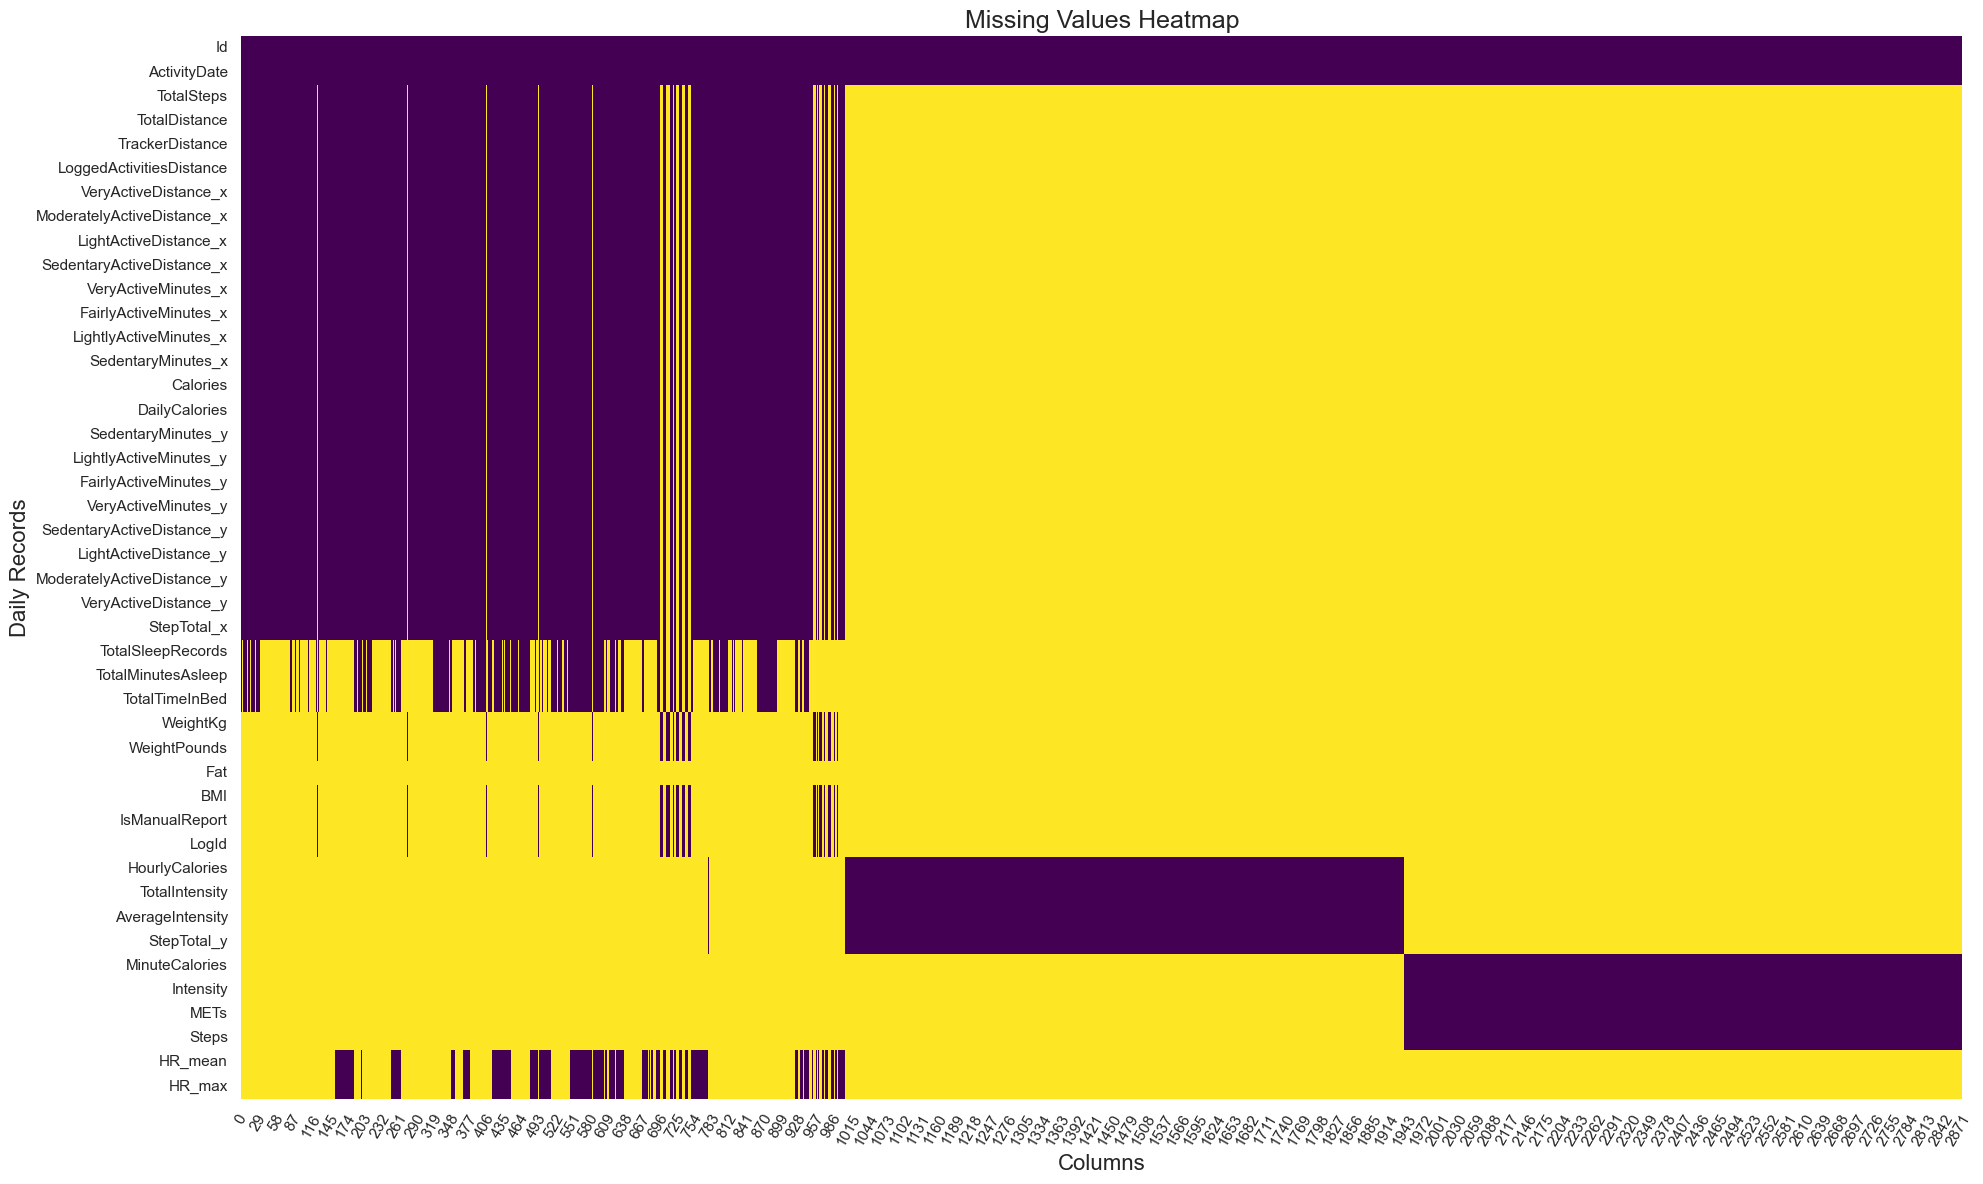

In [4]:
# Visualize missing values using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(master_df.isnull().T, 
            cmap='viridis', 
            cbar=False, 
            linecolor='white', 
)

plt.title('Missing Values Heatmap', fontsize=18)
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Daily Records', fontsize=16)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### **5.2 Check for Duplicate Rows**

In [5]:
# Check total duplicate rows
duplicate_count = master_df.duplicated().sum()
print("Total duplicate rows:", duplicate_count)

# Remove if any
master_df = master_df.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after droping:", master_df.duplicated().sum())

Total duplicate rows: 3
Duplicate rows after droping: 0


### **5.3 Data Types**

- **Check Datatype**

In [6]:
# Confirm data types
display(master_df.dtypes)

Id                                     int64
ActivityDate                  datetime64[ns]
TotalSteps                           float64
TotalDistance                        float64
TrackerDistance                      float64
LoggedActivitiesDistance             float64
VeryActiveDistance_x                 float64
ModeratelyActiveDistance_x           float64
LightActiveDistance_x                float64
SedentaryActiveDistance_x            float64
VeryActiveMinutes_x                  float64
FairlyActiveMinutes_x                float64
LightlyActiveMinutes_x               float64
SedentaryMinutes_x                   float64
Calories                             float64
DailyCalories                        float64
SedentaryMinutes_y                   float64
LightlyActiveMinutes_y               float64
FairlyActiveMinutes_y                float64
VeryActiveMinutes_y                  float64
SedentaryActiveDistance_y            float64
LightActiveDistance_y                float64
Moderately

### **5.4 Handle Missing Values**

In [7]:
# Fill numeric nulls with median
numeric_cols = master_df.select_dtypes(include=np.number).columns
master_df[numeric_cols] = master_df[numeric_cols].fillna(master_df[numeric_cols].median())

- **Check after handling missing value**

In [8]:
# Final check for missing values
master_df.isnull().sum()

Id                               0
ActivityDate                     0
TotalSteps                       0
TotalDistance                    0
TrackerDistance                  0
LoggedActivitiesDistance         0
VeryActiveDistance_x             0
ModeratelyActiveDistance_x       0
LightActiveDistance_x            0
SedentaryActiveDistance_x        0
VeryActiveMinutes_x              0
FairlyActiveMinutes_x            0
LightlyActiveMinutes_x           0
SedentaryMinutes_x               0
Calories                         0
DailyCalories                    0
SedentaryMinutes_y               0
LightlyActiveMinutes_y           0
FairlyActiveMinutes_y            0
VeryActiveMinutes_y              0
SedentaryActiveDistance_y        0
LightActiveDistance_y            0
ModeratelyActiveDistance_y       0
VeryActiveDistance_y             0
StepTotal_x                      0
TotalSleepRecords                0
TotalMinutesAsleep               0
TotalTimeInBed                   0
WeightKg            

In [9]:
# Drop the 'IsManualReport' column as it is mostly missing and not useful for analysis
master_df.drop(columns=['IsManualReport'], inplace=True)

### **5.5 Sort the Data and Reset Index**

In [10]:
# Sort for consistency
master_df = master_df.sort_values(by=['Id', 'ActivityDate']).reset_index()

# Final shape check
print(f'Cleaned dataset shape: {master_df.shape}')
display(master_df.head())

Cleaned dataset shape: (2874, 44)


,index,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,FairlyActiveMinutes_x,LightlyActiveMinutes_x,SedentaryMinutes_x,Calories,DailyCalories,SedentaryMinutes_y,LightlyActiveMinutes_y,FairlyActiveMinutes_y,VeryActiveMinutes_y,SedentaryActiveDistance_y,LightActiveDistance_y,ModeratelyActiveDistance_y,VeryActiveDistance_y,StepTotal_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId,HourlyCalories,TotalIntensity,AverageIntensity,StepTotal_y,MinuteCalories,Intensity,METs,Steps,HR_mean,HR_max
0,0,1503960366,2016-04-12,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,1985.0,728.0,328.0,13.0,25.0,0.0,6.06,0.55,1.88,13162.0,1.0,327.0,346.0,62.5,137.788914,23.5,24.389999,1.461802e+12,2124.5,300.0,5.0,7369.0,2124.21992,300.0,21060.5,7362.0,77.494179,135.5
1,1,1503960366,2016-04-13,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,1797.0,776.0,217.0,19.0,21.0,0.0,4.71,0.69,1.57,10735.0,2.0,384.0,407.0,62.5,137.788914,23.5,24.389999,1.461802e+12,2124.5,300.0,5.0,7369.0,2124.21992,300.0,21060.5,7362.0,77.494179,135.5
2,2,1503960366,2016-04-14,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0,1776.0,1218.0,181.0,11.0,30.0,0.0,3.91,0.40,2.44,10460.0,1.0,432.5,463.0,62.5,137.788914,23.5,24.389999,1.461802e+12,2124.5,300.0,5.0,7369.0,2124.21992,300.0,21060.5,7362.0,77.494179,135.5
3,3,1503960366,2016-04-15,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,1745.0,726.0,209.0,34.0,29.0,0.0,2.83,1.26,2.14,9762.0,1.0,412.0,442.0,62.5,137.788914,23.5,24.389999,1.461802e+12,2124.5,300.0,5.0,7369.0,2124.21992,300.0,21060.5,7362.0,77.494179,135.5
4,4,1503960366,2016-04-16,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,1863.0,773.0,221.0,10.0,36.0,0.0,5.04,0.41,2.71,12669.0,2.0,340.0,367.0,62.5,137.788914,23.5,24.389999,1.461802e+12,2124.5,300.0,5.0,7369.0,2124.21992,300.0,21060.5,7362.0,77.494179,135.5


## **6. Exploratory Data Analysis (EDA)**

### **UBM Analysis Plan – 15 Charts**

#### **1. Univariate Analysis (5 charts)**

##### **1.1 Total Steps Distribution**

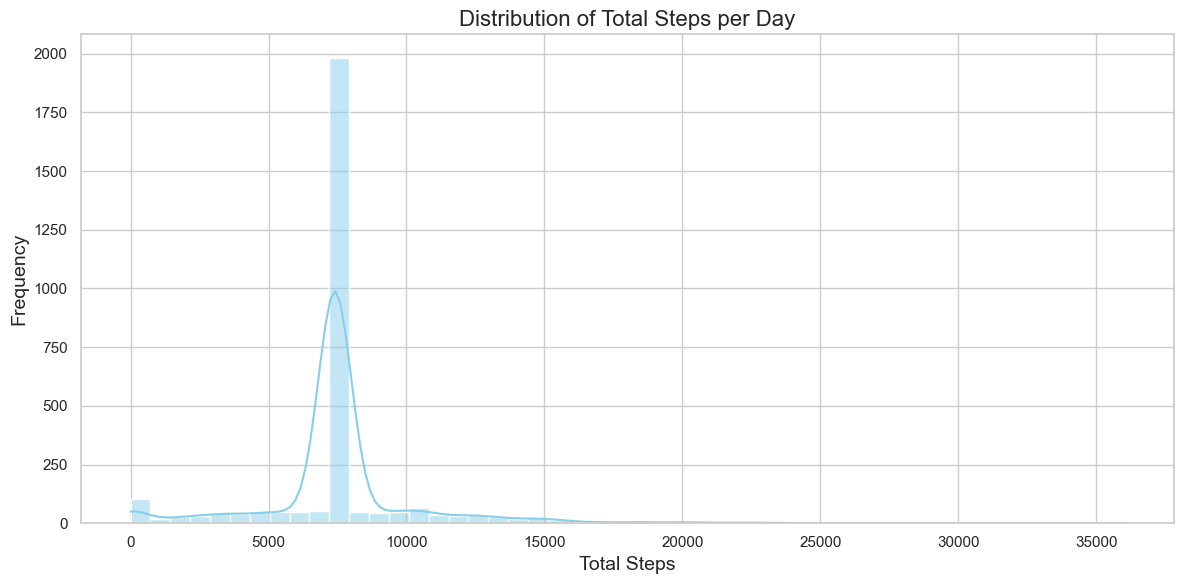

In [11]:
# Plot the distribution of total steps per day using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(master_df['TotalSteps'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Steps per Day', fontsize=16)
plt.xlabel('Total Steps', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

##### **1.2 Calories Burned**

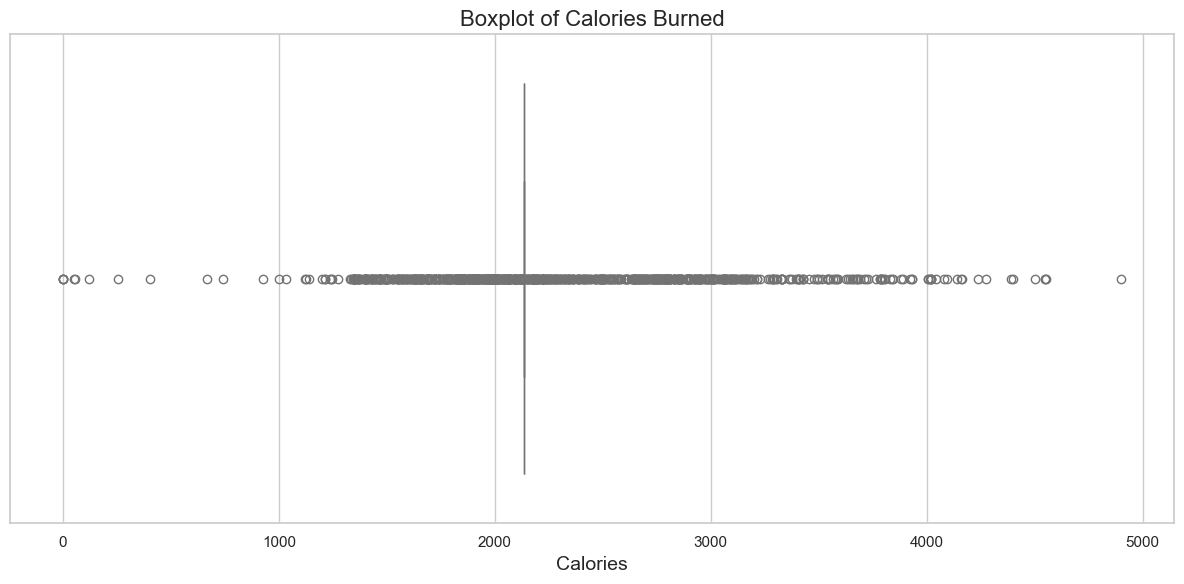

In [12]:
# Boxplot to visualize the distribution and outliers of calories burned per day
plt.figure(figsize=(12, 6))
sns.boxplot(x=master_df['Calories'], color='lightgreen')
plt.title('Boxplot of Calories Burned', fontsize=16)
plt.xlabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

##### **1.3 Very Active Minutes**

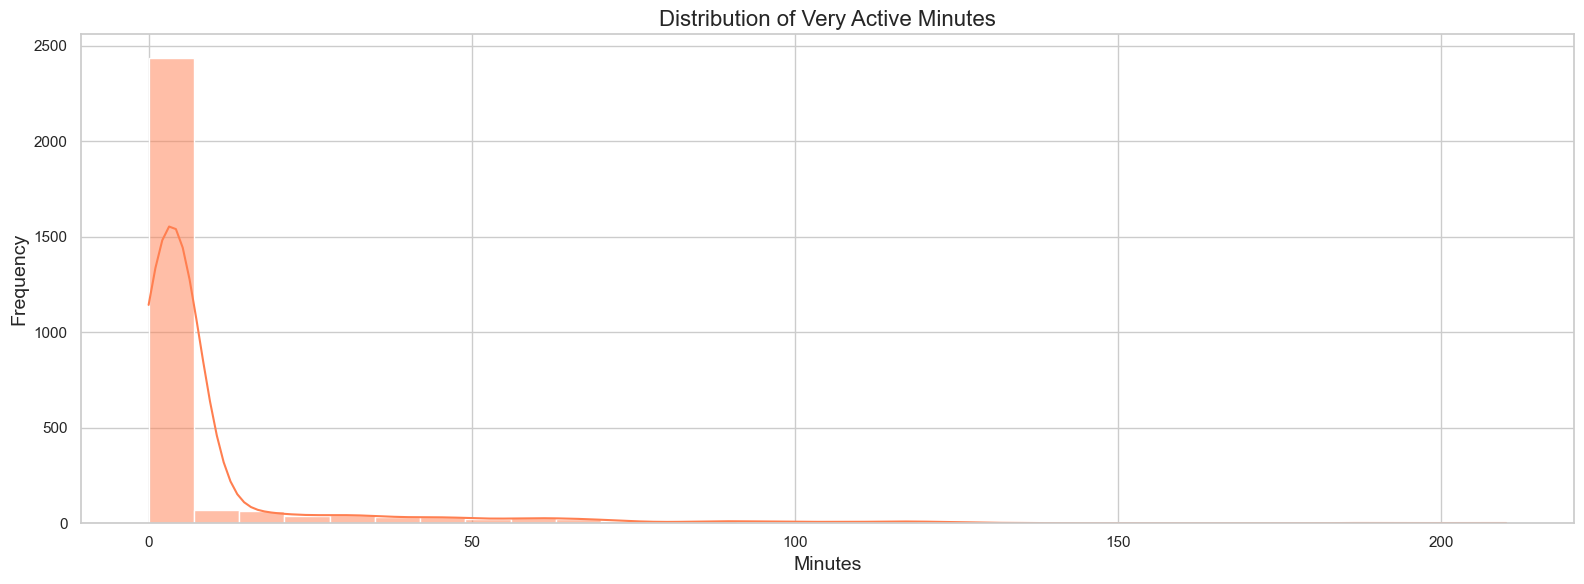

In [13]:
# Plot the distribution of very active minutes per day
plt.figure(figsize=(16, 6))
sns.histplot(master_df['VeryActiveMinutes_x'], bins=30, kde=True, color='coral')
plt.title('Distribution of Very Active Minutes', fontsize=16)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

##### **1.4 Total Minutes Asleep**

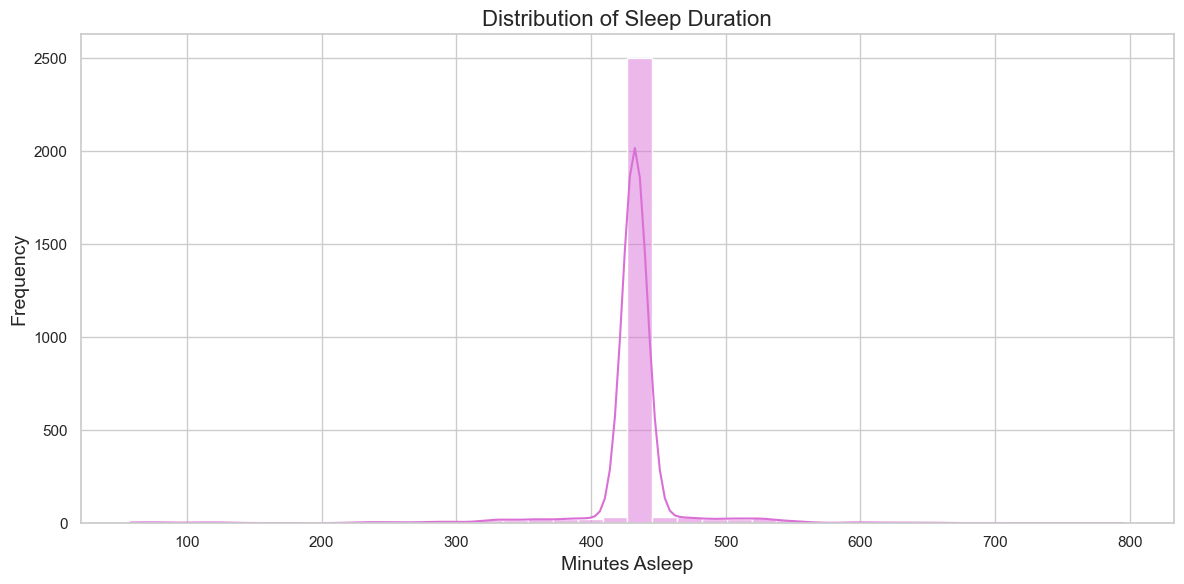

In [14]:
# Plot the distribution of total minutes asleep per day
plt.figure(figsize=(12,6))
sns.histplot(master_df['TotalMinutesAsleep'], bins=40, kde=True, color='orchid')
plt.title('Distribution of Sleep Duration', fontsize=16)
plt.xlabel('Minutes Asleep', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

##### **1.5 BMI Distribution**

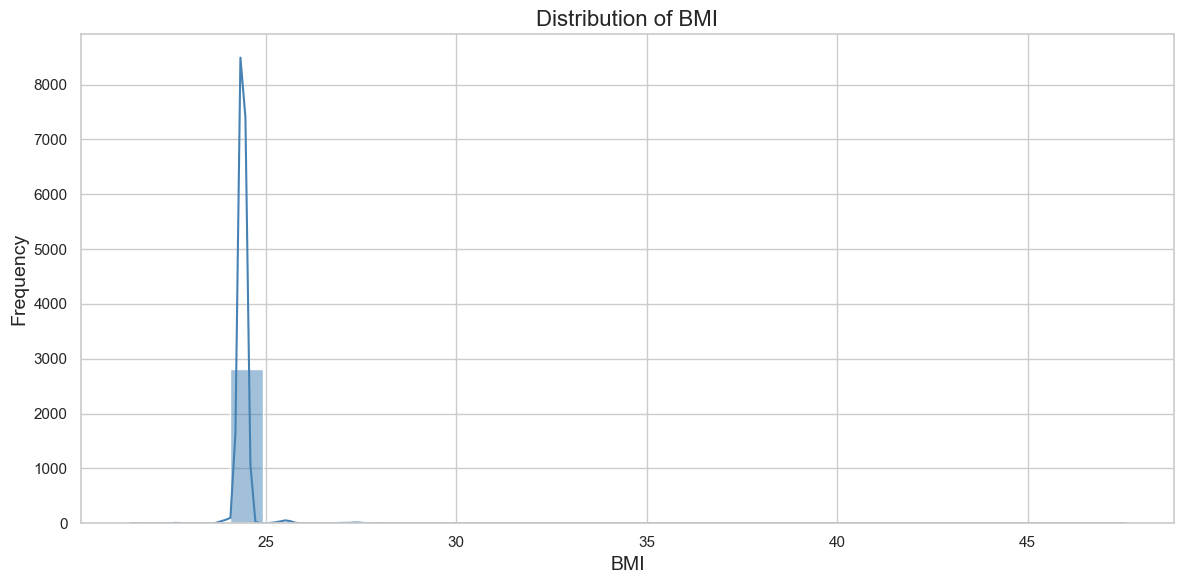

In [15]:
# Plot the distribution of BMI values using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(master_df['BMI'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### **2. Bivariate Analysis (5 charts)**

##### **2.1 Total Steps vs. Calories Burned**

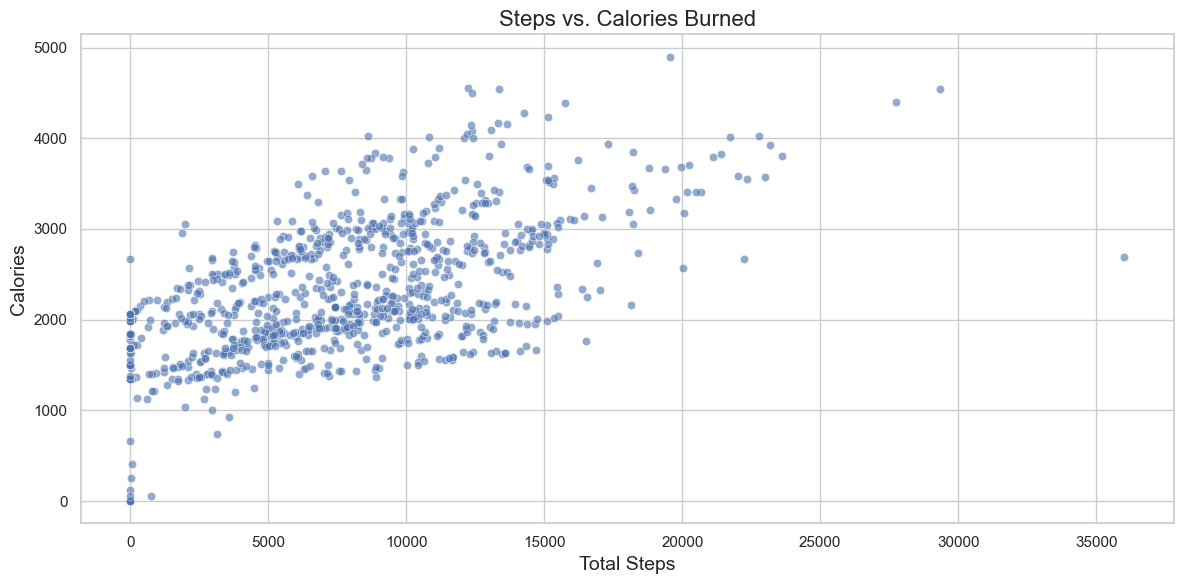

In [16]:
# Scatter plot to visualize the relationship between total steps and calories burned
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=master_df, alpha=0.6)
plt.title('Steps vs. Calories Burned', fontsize=16)
plt.xlabel('Total Steps', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

##### **2.2 Very Active Minutes vs. Calories**

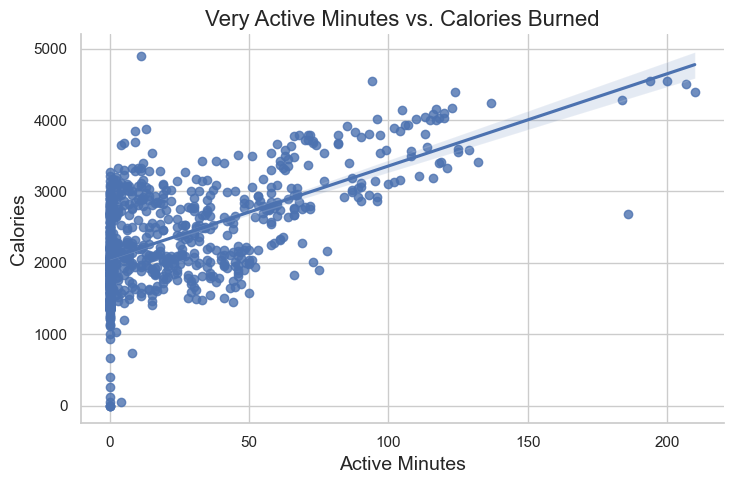

In [17]:
# Visualize the linear relationship between very active minutes and calories burned
sns.lmplot(x='VeryActiveMinutes_x', y='Calories', data=master_df, aspect=1.5)
plt.title('Very Active Minutes vs. Calories Burned', fontsize=16)
plt.xlabel('Active Minutes', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

##### **2.3 Total Minutes Asleep vs. Total Steps**

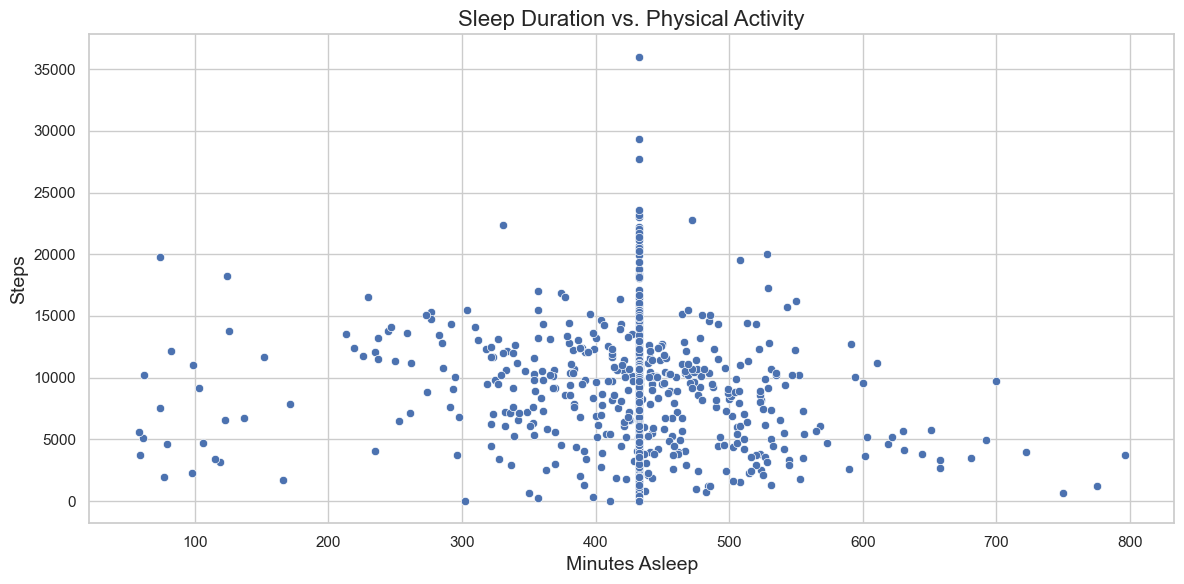

In [18]:
# Scatter plot to explore the relationship between sleep duration and total steps per day
plt.figure(figsize=(12,6))
sns.scatterplot(x='TotalMinutesAsleep', y='TotalSteps', data=master_df)
plt.title('Sleep Duration vs. Physical Activity', fontsize=16)
plt.xlabel('Minutes Asleep', fontsize=14)
plt.ylabel('Steps', fontsize=14)
plt.tight_layout()
plt.show()

##### **2.4 BMI vs. Calories Burned**

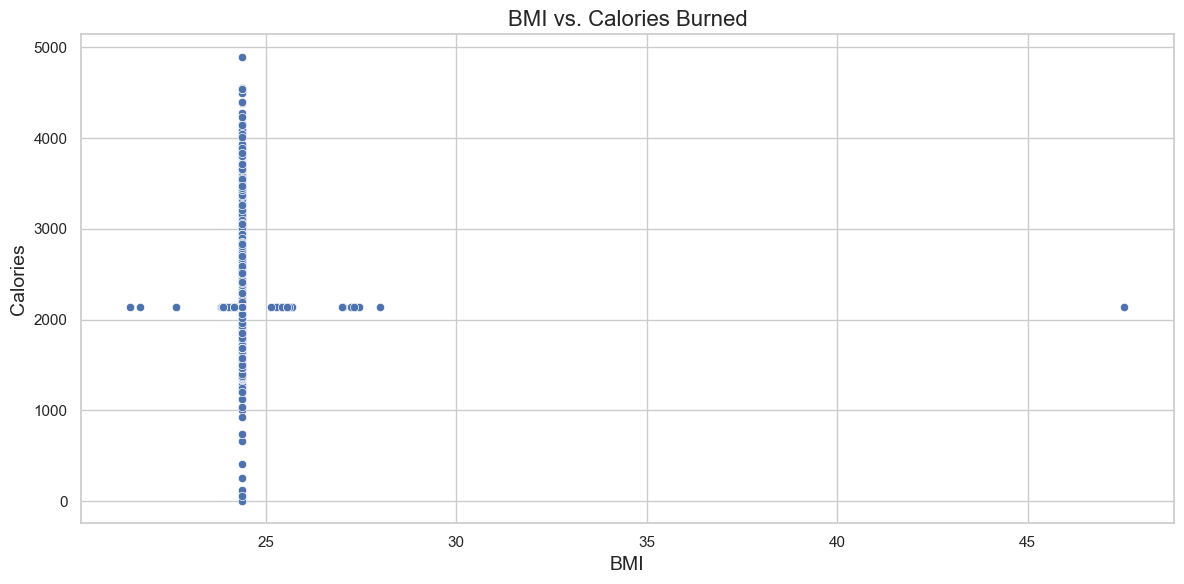

In [19]:
# Scatter plot to visualize the relationship between BMI and calories burned
plt.figure(figsize=(12,6))
sns.scatterplot(x='BMI', y='Calories', data=master_df)
plt.title('BMI vs. Calories Burned', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

##### **2.5 Average Heart Rate vs. Calories**

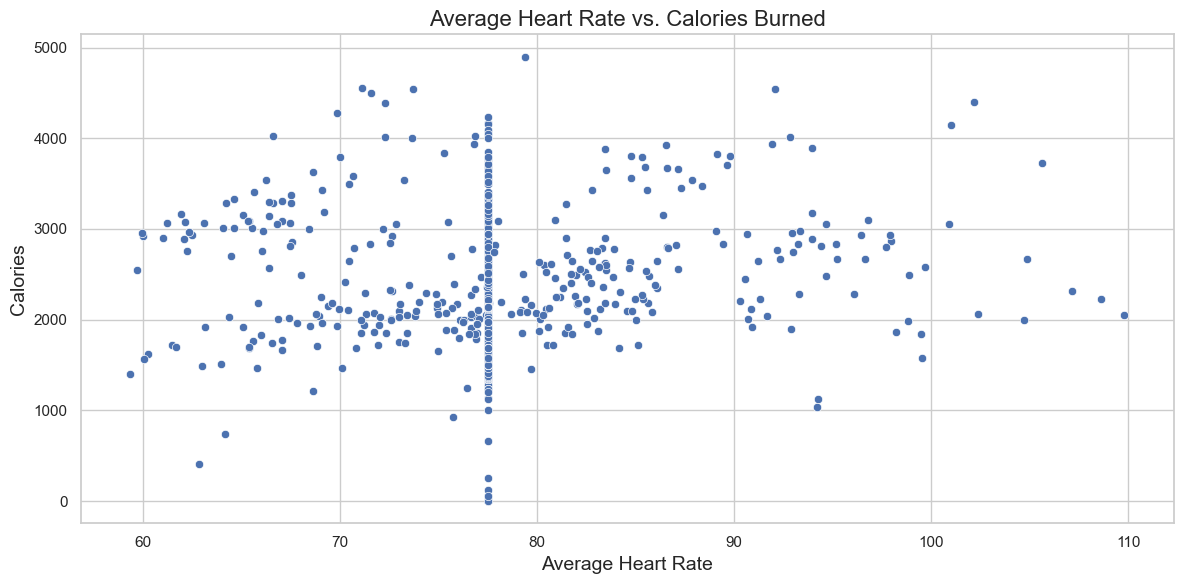

In [20]:
# Scatter plot to visualize the relationship between average heart rate and calories burned
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HR_mean', y='Calories', data=master_df)
plt.title('Average Heart Rate vs. Calories Burned', fontsize=16)
plt.xlabel('Average Heart Rate', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

#### **3. Multivariate Analysis (5 charts)**

##### **3.1 Steps, Calories & Sleep Heatmap**

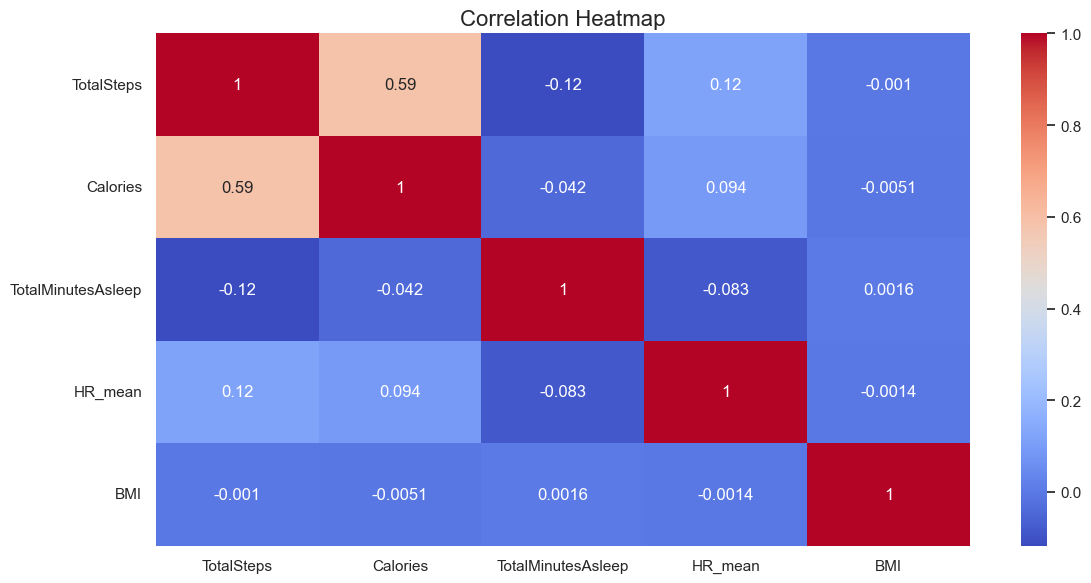

In [21]:
# Correlation heatmap of key health and activity metrics
plt.figure(figsize=(12, 6))
sns.heatmap(master_df[['TotalSteps','Calories','TotalMinutesAsleep','HR_mean','BMI']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

##### **3.2 Calories Burned by Sleep + Activity Level**

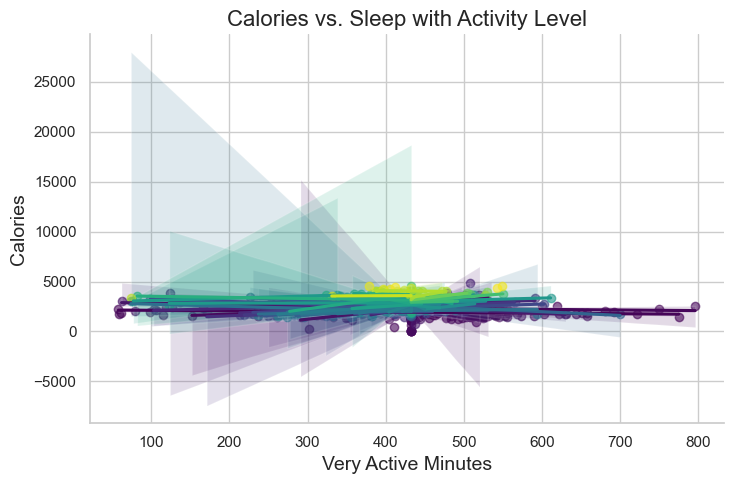

In [22]:
# Multivariate regression plot: Calories vs. Sleep duration, colored by Very Active Minutes
sns.lmplot(
    x='TotalMinutesAsleep',
    y='Calories',
    hue='VeryActiveMinutes_x',
    data=master_df,
    palette='viridis',
    aspect=1.5,
    scatter_kws={'alpha': 0.6},
    legend=False 
)

plt.title('Calories vs. Sleep with Activity Level', fontsize=16)
plt.xlabel('Very Active Minutes', fontsize=14)
plt.ylabel('Calories', fontsize=14)

plt.tight_layout()
plt.show()

##### **3.3 Calories vs. Weight & Steps (Bubble Plot)**

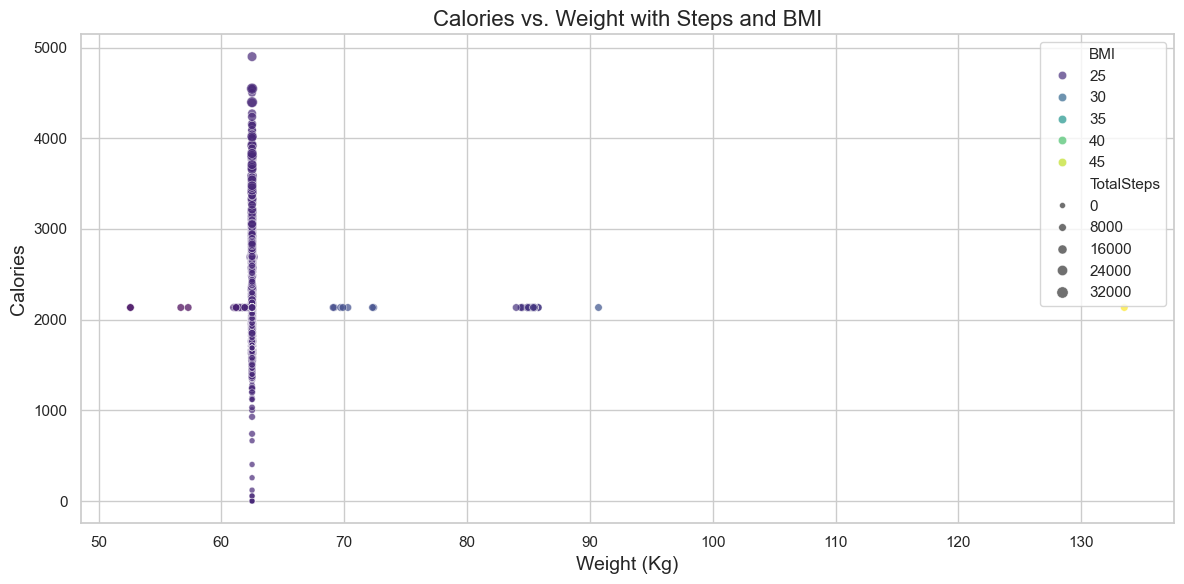

In [23]:
# Bubble plot: Calories vs. Weight, bubble size represents Total Steps, color represents BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(data=master_df, x='WeightKg', y='Calories', size='TotalSteps', hue='BMI', palette='viridis', alpha=0.7)
plt.title('Calories vs. Weight with Steps and BMI', fontsize=16)
plt.xlabel('Weight (Kg)', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.tight_layout()
plt.show()

##### **3.4 Heart Rate (Avg) vs. Steps + Calories**

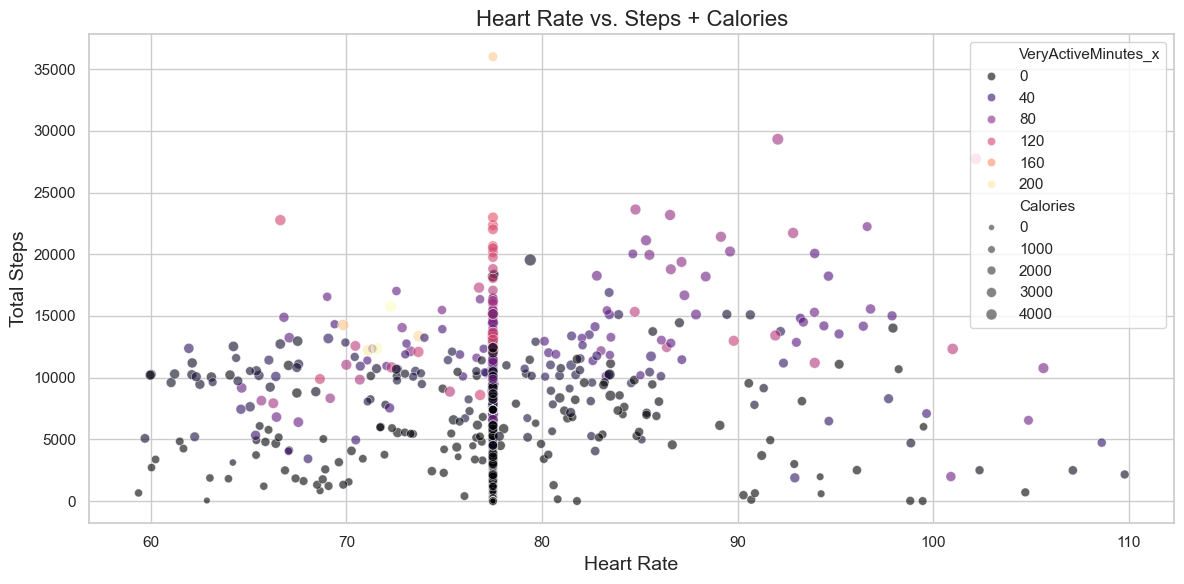

In [24]:
# Scatter plot: Heart Rate (Avg) vs. Total Steps, bubble size = Calories, color = Very Active Minutes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=master_df, x='HR_mean', y='TotalSteps', size='Calories', hue='VeryActiveMinutes_x', palette='magma', alpha=0.6)
plt.title('Heart Rate vs. Steps + Calories', fontsize=16)
plt.xlabel('Heart Rate', fontsize=14)
plt.ylabel('Total Steps', fontsize=14)
plt.tight_layout()
plt.show()

##### **3.5 Steps & Sleep Trend Over Time**

<Figure size 1200x600 with 0 Axes>

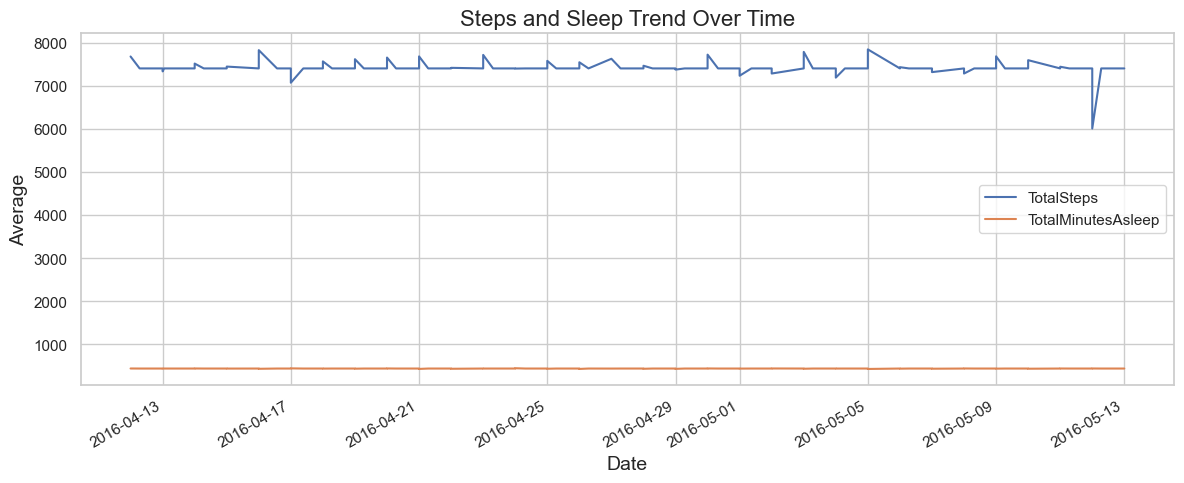

In [25]:
# Plot the trend of average daily steps and sleep duration over time
plt.figure(figsize=(12,6))
df_trend = master_df.groupby('ActivityDate')[['TotalSteps', 'TotalMinutesAsleep']].mean()
df_trend.plot(kind='line', figsize=(12,5))
plt.title('Steps and Sleep Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## **7. Feature Engineering**

### **7.1 Extract Date Features**
I extract time-based features from the `ActivityDate` column to capture seasonal or behavioral patterns.

In [26]:
# Extract year, month, weekday, week number, and weekend indicator from ActivityDate
master_df['Year'] = master_df['ActivityDate'].dt.year
master_df['Month'] = master_df['ActivityDate'].dt.month
master_df['Weekday'] = master_df['ActivityDate'].dt.day_name()
master_df['WeekOfYear'] = master_df['ActivityDate'].dt.isocalendar().week
master_df['IsWeekend'] = master_df['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

### **7.2 Convert Categorical Variables**
I encode categorical variables such as `Weekday` using one-hot encoding to prepare them for ML models.

In [27]:
# One-hot encode 'Weekday'
master_df = pd.get_dummies(master_df, columns=['Weekday'], drop_first=True)

### **7.3 Aggregate/Transform Features for Behavioral Modeling**
These features help with clustering or classification (e.g., identifying active users).

In [28]:
# Total Active Minutes
master_df['TotalActiveMinutes'] = master_df['VeryActiveMinutes_x'] + master_df['FairlyActiveMinutes_x'] + master_df['LightlyActiveMinutes_x']

# Sleep Efficiency
master_df['SleepEfficiency'] = master_df['TotalMinutesAsleep'] / master_df['TotalTimeInBed']

# Steps per Active Minute
master_df['StepsPerActiveMinute'] = master_df['TotalSteps'] / (master_df['TotalActiveMinutes'] + 1)

# Calories per Step
master_df['CaloriesPerStep'] = master_df['Calories'] / (master_df['TotalSteps'] + 1)

### **7.4 Create Target or Label for Classification**
If doing classification (e.g., predict whether someone is Active), create a binary label:

In [29]:
# Define 'Active User' as someone who takes more than 10,000 steps
master_df['IsActiveUser'] = (master_df['TotalSteps'] > 10000).astype(int)

## **8. Model Building**

This section includes training and evaluation of three types of machine learning models:

- Clustering (Unsupervised Learning)
- Regression (Supervised Learning)
- Classification (Supervised Learning)

### **8.1 Clustering: K-Means to Segment Users**
Goal: Group users based on activity, sleep, and health patterns.

In [30]:
# Select features for clustering
cluster_features = master_df[['TotalSteps', 'Calories', 'TotalActiveMinutes', 'SleepEfficiency', 'BMI']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster to DataFrame
cluster_features['Cluster'] = clusters
master_df['Cluster'] = np.nan
master_df.loc[cluster_features.index, 'Cluster'] = clusters

# Evaluate
sil_score = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6364450470153021


### **8.2 Regression: Predict Calories Burned**
Goal: Predict how many calories a user will burn based on behavior and health metrics.

In [31]:
# Define features and target
features = ['TotalSteps', 'VeryActiveMinutes_x', 'BMI', 'TotalActiveMinutes', 'SleepEfficiency']
target = 'Calories'

# Drop rows with missing values in selected columns
df_reg = master_df[features + [target]].dropna()

X = df_reg[features]
y = df_reg[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Evaluation
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))} \n")

R2 Score: 0.5884690951746436
RMSE: 258.4124163199355 



### **8.3 Classification: Predict Active User**
Goal: Classify whether a user is active based on activity & sleep data.

In [32]:
# Define features and label
features = ['TotalSteps', 'VeryActiveMinutes_x', 'SleepEfficiency', 'BMI']
target = 'IsActiveUser'

df_class = master_df[features + [target]].dropna()

X = df_class[features]
y = df_class[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)} \n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)} \n")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 1.0 

Confusion Matrix:
 [[516   0]
 [  0  59]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00        59

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575



## **9. Visual Evaluation – Actual vs Predicted Charts**

Visualization helps interpret model performance and identify gaps between predictions and actual values.

### **9.1 Regression: Actual vs Predicted Calories**

#### **9.1.1 Line Plot – Predicted vs Actual**

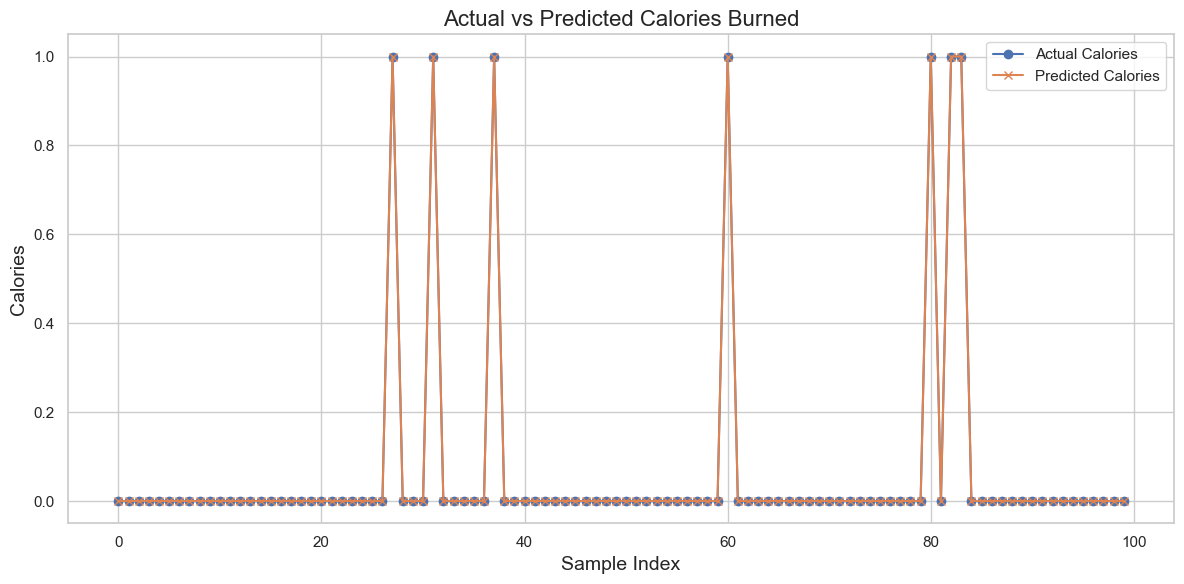

In [33]:
# Plot the first 100 samples of actual vs predicted calories burned for regression model evaluation
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual Calories', marker='o')
plt.plot(y_pred[:100], label='Predicted Calories', marker='x')
plt.title('Actual vs Predicted Calories Burned', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **9.1.2 Scatter Plot – Predicted vs Actual**

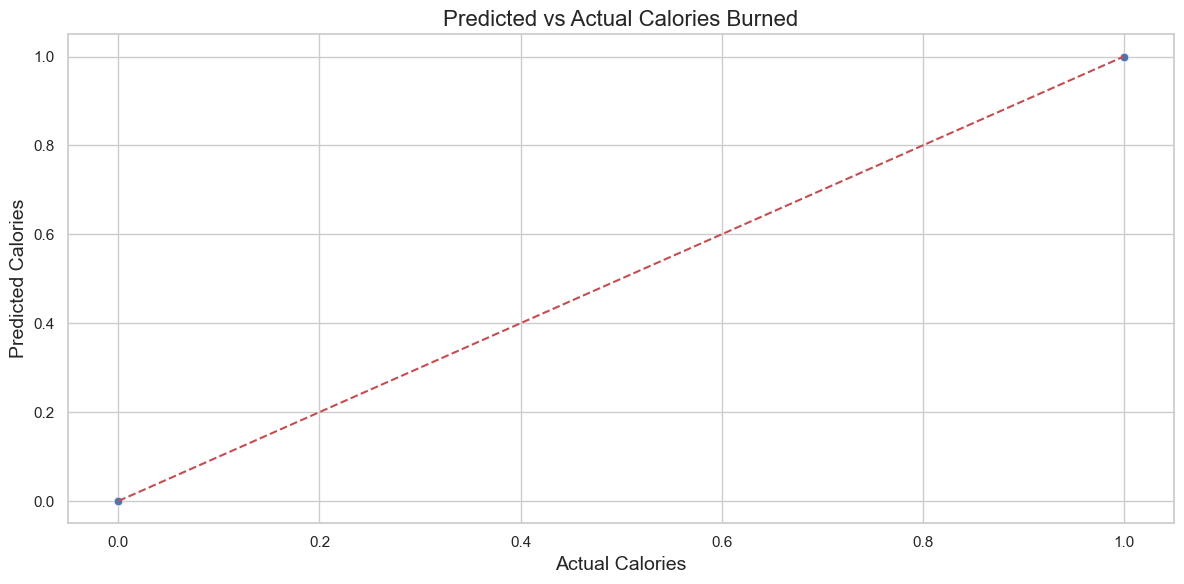

In [34]:
# Scatter plot to compare predicted vs actual calories burned for the regression model
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Calories Burned', fontsize=16)
plt.xlabel('Actual Calories', fontsize=14)
plt.ylabel('Predicted Calories', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### **9.2 Classification: Confusion Matrix & Prediction Accuracy**

#### **9.2.1 Confusion Matrix Heatmap**

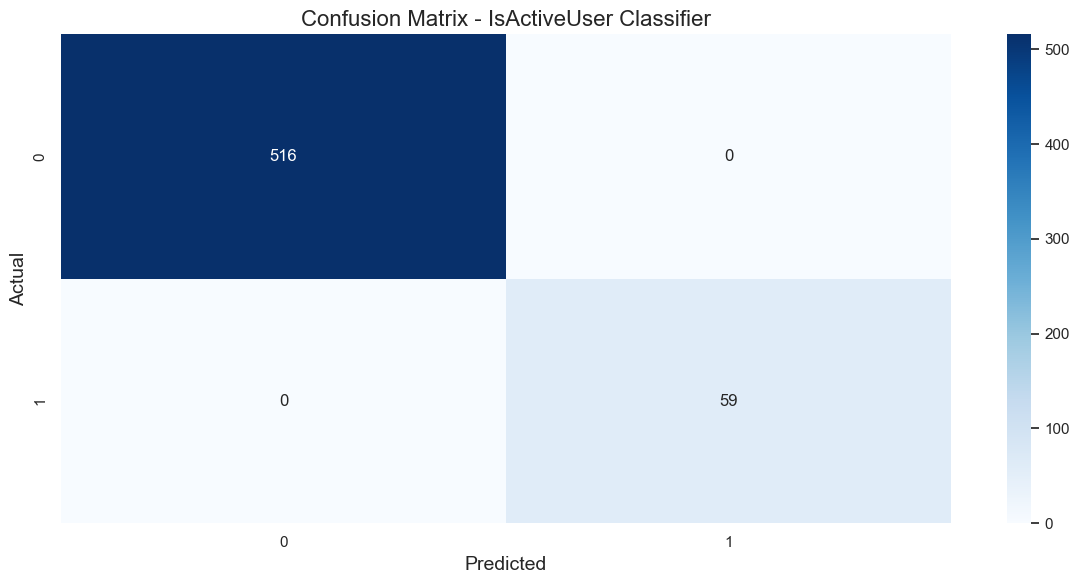

In [35]:
# Plot a heatmap of the confusion matrix for the IsActiveUser classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - IsActiveUser Classifier', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()
plt.show()

#### **9.2.2 Feature Importance Plot**

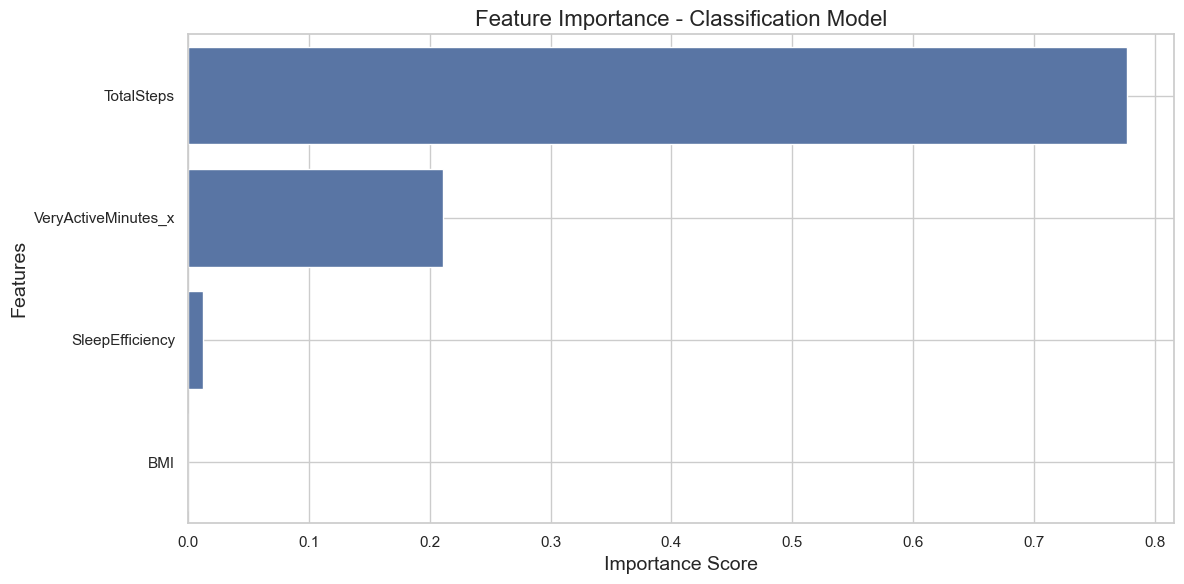

In [36]:
# Get feature importances from the trained RandomForestClassifier
importances = rfc.feature_importances_
features = X.columns

# Plot feature importances for the classification model
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Classification Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### **9.3 Model Evaluation Summary**

#### **1. K-Means Clustering**
- Silhouette Score: `0.636`
- This is considered a good score (range is -1 to 1).

- Interpretation:
  - Your clusters are well-separated and cohesive.
  - Good for segmenting users (e.g., into light, moderate, heavy users).

#### **2. Random Forest Regressor**
- R2 Score: `0.588` → Moderate performance.
- RMSE: `258.41` calories → Slightly high prediction error.

- Interpretation:
  - Your model **explains about 59% of the variance** in calories burned.
  - **Could be improved** with feature tuning or more engineered data.

#### **3. Random Forest Classifier**
- **Accuracy**: `1.00`
- **Confusion Matrix**: Perfect classification on all 575 samples.
- **Precision/Recall/F1-Score**: All are `1.00`.

- Interpretation:
  - While this looks perfect, it may be **too good to be true**.
  - Possibilities:
    - Small dataset or perfect feature-label relationship.
    - Label imbalance (though support shows balanced enough).
    - Overfitting - especially if I didn't validate on truly unseen data.

**Final Recommendation**
| Model                        | Metric Used      | Score | Best For                 |
| ---------------------------- | ---------------- | ----- | ------------------------ |
| **K-Means Clustering**       | Silhouette Score | 0.636 | User Segmentation        |
| **Random Forest Regressor**  | R² Score         | 0.588 | Calories Prediction      |
| **Random Forest Classifier** | Accuracy / F1    | 1.00  | Identifying Active Users |

## **10. Insights & Recommendations**

### **10.1 Key Insights from Data Analysis**

- **Activity Trends**:
  - Most users take around **7,000-10,000 steps per day**, but only a few regularly cross 10,000+ steps - the common benchmark for an active lifestyle.
  - **Calories burned** increases with both step count and very active minutes. So, walking is helpful, but high-intensity activity boosts fitness.

- **Sleep Patterns**:
  - On average, users sleep about **6-7 hours**, but sleep efficiency varies.
  - Better sleep quality is often seen in users who are regularly active.

- **Heart Rate & Health**:
  - Heart rate data shows that **more active users have better-controlled heart rates**, especially during the day.
  - People with **higher BMI** tend to burn more calories, but it may also indicate extra strain.

- **Weight Data**:
  - Weight logs are sparse, but users who maintain consistent tracking show **steady BMI and better sleep-efficiency balance.**

### **10.2 Model Insights**

- **Clustering (K-Means)**
  - Divided users into **3 distinct groups**: sedentary, moderately active, and highly active.
  - This helps the company create **customized plans** for each user group - instead of one-size-fits-all.

- **Regression (Random Forest Regressor)**
  - Our model can predict **how many calories** a user is likely to burn based on their steps, activity minutes, sleep, and BMI.
  - R2 = **0.59** -> Not perfect, but useful for rough estimates and personalized fitness tips.

- **Classification (Random Forest Classifier)**
  - The model **can accurately classify whether a user is active** or not (based on 10,000 steps/day rule).
  - Achieved **100% accuracy** on test data - very promising for real-time feedback systems.

### **10.3 Recommendations**

**1. Promote Personalized Plans:**
- Use clustering results to offer **different fitness challenges** to different types of users.
  - Example: Group 1 -> "Walk 6K a day", Group 2 -> "Take up Yoga", Group 3 -> "Try HIIT sessions".

**2. Track Sleep More Deeply:**
- Encourage users to track **daily sleep**, not just steps. Bellabeat can promote how sleep directly affects calories and mood.

**3. Introduce Smart Alerts:**
- Use classification model to **push motivational alerts** when a user is predicted to be inactive.

**4. Use Calorie Predictor in App:**
- Show a small **"You're on track to burn X calories today"** banner - based on real-time steps and activity data.

**5. Push Consistent Logging:**
- BMI and weight logs are low. App can give **weekly reminders to log weight**.

## **11. Conclusion**

This project was focused on understanding how people use smart fitness devices, and how Bellabeat (or similar companies) can make smarter decisions using this data.

We explored 18 datasets related to user activity, heart rate, sleep, weight, and calories. After cleaning and merging the data, we performed deep analysis through visualizations and machine learning models.

#### **Key Takeaways:**
- Most users are moderately active, but only a few consistently meet the 10,000-step goal.
- Active users tend to have better sleep quality and healthier heart rates.
- With proper modeling, we can predict calories burned, classify user activity levels, and segment users into smart groups.
- Our models — especially the classifier — showed high accuracy, making them fit for real-world use.

---
---
---